<a href="https://www.bigdatauniversity.com"><img src = "https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width = 400, align = "center"></a>

<h1 align=center><font size = 5> Classification with Python</font></h1>

In this notebook we try to practice all the classification algorithms that we learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
print('here')
from matplotlib.ticker import NullFormatter
import pandas as pd
import matplotlib.ticker as ticker
print('here')
from sklearn import preprocessing
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
print('here2')
print('here3')
from sklearn import tree
import seaborn as sns
import scipy.optimize as opt
import matplotlib.pyplot as plt
from sklearn import svm
print('here4')
from sklearn.metrics import classification_report, confusion_matrix
print('here5')
import pydotplus
import matplotlib.image as mpimg
from sklearn.externals.six import StringIO

here
here
here2
here3
here4
here5


ImportError: No module named 'pydotplus'

### About dataset

In [ ]:
#!conda install -c anaconda graphviz


This dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

Lets download the dataset

In [2]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2018-10-08 06:14:47--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.07s   

2018-10-08 06:14:48 (302 KB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File  

In [3]:
df = pd.read_csv('loan_train.csv')
df.head()


,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [4]:
df.shape

(346, 10)

### Convert to date time object 

In [5]:
df['due_date']=pd.to_datetime(df['due_date'])
df['effective_date']=pd.to_datetime(df['effective_date'])
#df.head()

# Data visualization and pre-processing



Let’s see how many of each class is in our data set 

In [6]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection 


Lets plot some columns to underestand data better:

In [7]:
# notice: installing seaborn might takes a few minutes
#!conda install -c anaconda seaborn -y

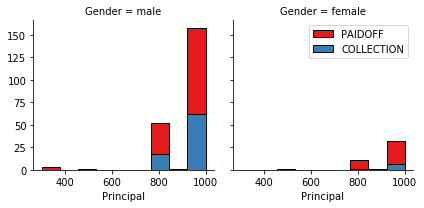

In [8]:
bins=np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

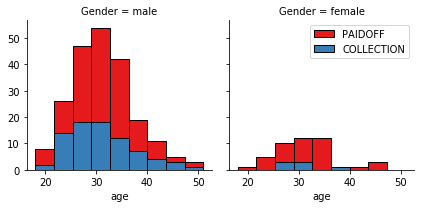

In [9]:
bins=np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction

### Lets look at the day of the week people get the loan 

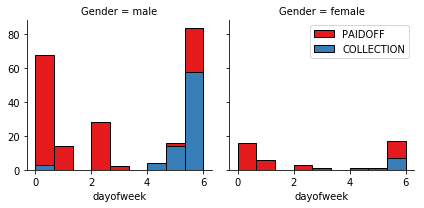

In [10]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins=np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4 

In [11]:
df['weekend']= df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values

Lets look at gender:

In [12]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)


Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Lets convert male to 0 and female to 1:


In [13]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding  
#### How about education?

In [14]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Feature befor One Hot Encoding

In [15]:
df[['Principal','terms','age','Gender','education']].head()


,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame 

In [16]:
Feature=df[['Principal','terms','age','Gender','weekend']]
Feature=pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature selection

Lets defind feature sets, X:

In [17]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?

In [18]:
y = df['loan_status'].values
y[0:5]
y_paid =df['loan_status']
y_paid= df['loan_status'].apply(lambda x: 0 if (x == 'COLLECTION')  else 1).values
y_paid


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0,

## Normalize Data 

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [19]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classification 

Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression



__ Notice:__ 
- You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
- You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
- You should include the code of the algorithm in the following cells.

# K Nearest Neighbor(KNN)
Notice: You can find the best k to build the model with the best accuracy.  
**warning:** You should not use the __loan_test.csv__ for finding the best k, however, you can split your train_loan.csv into train and test to find the best __k__.

Train-Test-Split
Train set: (276, 8) (276,)
Test set: (70, 8) (70,)
Training for K=3 first
Y_hat
Train set Accuracy:  0.865942028986
Test set Accuracy:  0.671428571429
Training for Ks 0-10
Mean accuracy
Accuracy Plot


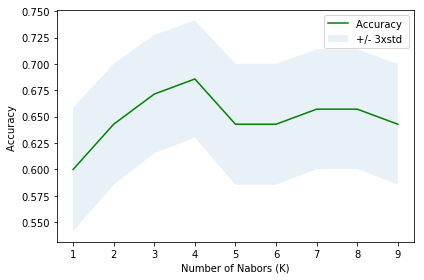

The best accuracy was with 0.685714285714 with k= 4


In [20]:
                                        ## FINDING K Using Train test Split ##
#Train test split

print ('Train-Test-Split')
from sklearn.model_selection import train_test_split
X_trainknn, X_testknn, y_trainknn, y_testknn = train_test_split( X, y, test_size=0.2, random_state=3)
print ('Train set:', X_trainknn.shape,  y_trainknn.shape)
print ('Test set:', X_testknn.shape,  y_testknn.shape)

#KNN Classifier

from sklearn.neighbors import KNeighborsClassifier
#Training
print ('Training for K=3 first')
k = 3
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_trainknn,y_trainknn)
neigh

#Predicting

print ('Y_hat')
yhatpre = neigh.predict(X_testknn)
yhatpre[0:5]

#Accuracy Evaluation

from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_trainknn, neigh.predict(X_trainknn)))
print("Test set Accuracy: ", metrics.accuracy_score(y_testknn, yhatpre))

#FOr different Ks

print ('Training for Ks 0-10')
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_trainknn,y_trainknn)
    yhatpre=neigh.predict(X_testknn)
    mean_acc[n-1] = metrics.accuracy_score(y_testknn, yhatpre)

    
    std_acc[n-1]=np.std(yhatpre==y_testknn)/np.sqrt(yhatpre.shape[0])
print ('Mean accuracy')
mean_acc

#Accuracy plot

print ('Accuracy Plot')
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

#Best accuracy

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

In [21]:
                            ## KNN for K=4 ##
#KNN Classifier

from sklearn.neighbors import KNeighborsClassifier
#Training
print ('Training KNN for K=4')
k = 4
#Train Model and Predict  
neighKNN = KNeighborsClassifier(n_neighbors = k).fit(X,y)
neighKNN
#Predicting
print ('Y_hatKNN')
yhatKNN = neighKNN.predict(X)
yhatKNN[0:5]
#Accuracy Evaluation
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y, neighKNN.predict(X)))


Training KNN for K=4
Y_hatKNN
Train set Accuracy:  0.815028901734


# Decision Tree

In [22]:
#Decision tree classifier
loanTree = DecisionTreeClassifier(criterion="entropy", max_depth = 9)
loanTree # it shows the default parameters
#fit model
loanTree.fit(X,y)
#Prediction dataset
predTree = loanTree.predict(X)
print (predTree [0:5])
print (y[0:5])
#Evaluation
print("LoanTrees's Accuracy on Trainset: ", metrics.accuracy_score(y, predTree))




['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']
['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']
LoanTrees's Accuracy on Trainset:  0.843930635838


In [23]:
    
#Visualise tree
dot_data = StringIO()
filename = "loantree.png"
featureNames = Feature.columns[0:8]
targetNames = df['loan_status'].unique().tolist()
out=tree.export_graphviz(loanTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')   
    
   

NameError: name 'StringIO' is not defined

# Support Vector Machine

In [24]:
#The SVM algorithm offers a choice of kernel functions for performing its processing. Basically, mapping data into a higher dimensional space is called kernelling. The 
#mathematical function used for the transformation is known as the kernel function, and can be of different types, such as:
#1.Linear
#2.Polynomial
#3.Radial basis function (RBF)
#4.Sigmoid

### USing - (Radial Basis Function)

clf = svm.SVC(kernel='rbf')
clf.fit(X, y)
#Fit
yhatSVM = clf.predict(X)
print("yhat calculated")
yhatSVM [0:5]


#Evalaute

#F1Score
from sklearn.metrics import f1_score
print(f1_score(y, yhatSVM, average='weighted'))
#Jaccard
from sklearn.metrics import jaccard_similarity_score
print(jaccard_similarity_score(y, yhatSVM))



yhat calculated
0.664768857753
0.760115606936


# Logistic Regression

In [25]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X,y_paid)
LR
#Predict
yhatLR = LR.predict(X)
#yhatLR
#Probability of prediction
yhat_prob = LR.predict_proba(X)
#yhat_prob


# Model Evaluation using Test set

First, download and load the test set:

In [26]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2018-10-08 06:15:01--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

100%[======================================>] 3,642       --.-K/s   in 0s      

2018-10-08 06:15:01 (592 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load Test set for evaluation 

In [27]:
df_t = pd.read_csv('loan_test.csv')
df_t.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


### Changing test Dataframe similar to loan Dataframe

In [28]:
df_t.shape
df_t['due_date']=pd.to_datetime(df_t['due_date'])
df_t['effective_date']=pd.to_datetime(df_t['effective_date'])

df_t['loan_status'].value_counts()
df_t['dayofweek'] = df_t['effective_date'].dt.dayofweek

df_t['weekend']= df_t['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df_t.head()
df_t.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

df_t['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df_t.head()
df_t.groupby(['education'])['loan_status'].value_counts(normalize=True)
df_t[['Principal','terms','age','Gender','education']].head()

Feature_t=df_t[['Principal','terms','age','Gender','weekend']]
Feature_t=pd.concat([Feature_t,pd.get_dummies(df_t['education'])], axis=1)
Feature_t.drop(['Master or Above'], axis = 1,inplace=True)
Feature_t.head()
X_testd = Feature_t
X_testd[0:5]

y_testd = df_t['loan_status'].values
y_testd[0:5]

y_testpaid =df_t['loan_status']
y_testpaid= df_t['loan_status'].apply(lambda x: 0 if (x == 'COLLECTION')  else 1).values
y_testpaid

# Normalizing Dataset
X_testd= preprocessing.StandardScaler().fit(X_testd).transform(X_testd)
X_testd[0:5]

array([[ 0.49362588,  0.92844966,  3.05981865,  1.97714211, -1.30384048,
         2.39791576, -0.79772404, -0.86135677],
       [-3.56269116, -1.70427745,  0.53336288, -0.50578054,  0.76696499,
        -0.41702883, -0.79772404, -0.86135677],
       [ 0.49362588,  0.92844966,  1.88080596,  1.97714211,  0.76696499,
        -0.41702883,  1.25356634, -0.86135677],
       [ 0.49362588,  0.92844966, -0.98251057, -0.50578054,  0.76696499,
        -0.41702883, -0.79772404,  1.16095912],
       [-0.66532184, -0.78854628, -0.47721942, -0.50578054,  0.76696499,
         2.39791576, -0.79772404, -0.86135677]])

### applying models created on test data

In [29]:
                        ## KNN Evaluation ##
#Predicting
print ('KNN Evaluation')
print ('Y_hat')
yhatKNN_Test = neighKNN.predict(X_testd)
yhatKNN_Test[0:5]

#Accuracy Evaluation

from sklearn import metrics
print("KNN Accuracy on Trainset: ", metrics.accuracy_score(y, neighKNN.predict(X)))
print("KNN Accuracy on Testset: ", metrics.accuracy_score(y_testd, yhatKNN_Test))

                    ## Decision Tree Evaluation ##
    
predTreeTest = loanTree.predict(X_testd)
print (predTreeTest [0:5])
print (y_testd[0:5])
#Evaluation
print("LoanTrees's Accuracy on Trainset: ", metrics.accuracy_score(y, predTree))
print("LoanTrees's Accuracy on Testset: ", metrics.accuracy_score(y_testd, predTreeTest))

                    ## SVM ##
yhatSVM_Test = clf.predict(X_testd)
yhatSVM_Test [0:5]

                    ## Logistic Evaluation ##

yhatLR_Test = LR.predict(X_testd)
#yhatLR
#Probability of prediction
yhat_prob_test = LR.predict_proba(X_testd)

KNN Evaluation
Y_hat
KNN Accuracy on Trainset:  0.815028901734
KNN Accuracy on Testset:  0.62962962963
['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'COLLECTION']
['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']
LoanTrees's Accuracy on Trainset:  0.843930635838
LoanTrees's Accuracy on Testset:  0.740740740741


In [30]:
#F1Score
from sklearn.metrics import f1_score
#Jaccard
from sklearn.metrics import jaccard_similarity_score
    ## Log Loss ##
from sklearn.metrics import log_loss

In [31]:
# the accuracy of the built model using different evaluation metrics:
print("KNN")
print('.......f1_score')
print(f1_score(y_testd, yhatKNN_Test, average='weighted'))

print('.......Jaccard score')
print(jaccard_similarity_score(y_testd, yhatKNN_Test))


KNN
.......f1_score
0.643031189084
.......Jaccard score
0.62962962963


In [32]:
print("Decision tree")
print('f1_score')
#print(f1_score(predTreeTestf1, y_testdf1))
print('Jaccard score')
print(jaccard_similarity_score(y_testd, predTreeTest))

Decision tree
f1_score
Jaccard score
0.740740740741


In [33]:
print("SVM")
print('.......f1_score')
print(f1_score(y_testd, yhatSVM_Test, average='weighted'))

print('.......Jaccard score')
print(jaccard_similarity_score(y_testd, yhatSVM_Test))

SVM
.......f1_score
0.621266427718
.......Jaccard score
0.722222222222


In [34]:
print("Logistic Regression")
print('.......f1_score')
print(f1_score(y_testpaid, yhatLR_Test, average='weighted'))

print('.......Jaccard score')
print(jaccard_similarity_score(y_testpaid, yhatLR_Test))

print('.......Log Loss')
print(log_loss(y_testpaid, yhat_prob_test))

Logistic Regression
.......f1_score
0.630417651694
.......Jaccard score
0.740740740741
.......Log Loss
0.556608494631


/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Report
You should be able to report the accuracy of the built model using different evaluation metrics:

| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | ?       | ?        | NA      |
| Decision Tree      | ?       | ?        | NA      |
| SVM                | ?       | ?        | NA      |
| LogisticRegression | ?       | ?        | ?       |

## Want to learn more?

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: [SPSS Modeler](http://cocl.us/ML0101EN-SPSSModeler).

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at [Watson Studio](https://cocl.us/ML0101EN_DSX)


<hr>
Copyright &copy; 2018 [Cognitive Class](https://cocl.us/DX0108EN_CC). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).​

### Thanks for completing this lesson!

Notebook created by: <a href = "https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>